In [1]:
!pip install --upgrade pip
!pip install imutils
!pip install opencv-python

Requirement already up-to-date: pip in c:\users\adm\anaconda3\lib\site-packages (20.1)


In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from IPython.display import Image
from imutils import paths
import numpy as np
import cv2
import os

In [3]:
def extract_histogram(image, bins=(8, 8, 8)):
    hist = cv2.calcHist([image], [0, 1, 2], None, bins, [0, 256, 0, 256, 0, 256])
    cv2.normalize(hist, hist)
    return hist.flatten()

In [4]:
imagePaths = sorted(list(paths.list_images('train')))
data = []
labels = []

for (i, imagePath) in enumerate(imagePaths):
    image = cv2.imread(imagePath, 1)
    label = imagePath.split(os.path.sep)[-1].split(".")[0]
    hist = extract_histogram(image)
    data.append(hist)
    labels.append(label)

0


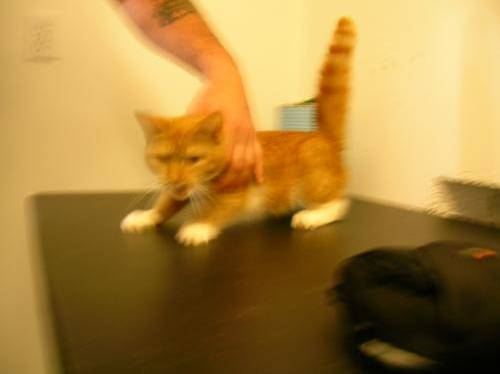

In [5]:
le = LabelEncoder()
labels = le.fit_transform(labels)
print(labels[0])
Image(filename=imagePaths[0])

In [6]:
(trainData, testData, trainLabels, testLabels) = train_test_split(np.array(data), labels, test_size=0.25, random_state = 19)

In [7]:
model = LinearSVC(random_state = 19, C = 0.6)
model.fit(trainData, trainLabels)

LinearSVC(C=0.6, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=19, tol=0.0001,
          verbose=0)

In [8]:
predictions = model.predict(testData)

In [9]:
print(classification_report(testLabels, predictions, target_names=le.classes_))

              precision    recall  f1-score   support

         cat       0.51      0.76      0.61       104
         dog       0.74      0.48      0.58       146

    accuracy                           0.60       250
   macro avg       0.62      0.62      0.60       250
weighted avg       0.64      0.60      0.59       250



In [10]:
from sklearn.metrics import f1_score
predictions = model.predict(testData)
f1_score(testLabels, predictions, average='macro')

0.5954757365545746

In [11]:
model.coef_[0][10]

-0.42013607376559975

In [12]:
model.coef_[0][12]

-0.08045026582280677

In [13]:
model.coef_[0][317]

-0.0949568769091171

In [23]:
singleImage = cv2.imread('cat.1002.jpg')
histt = extract_histogram(singleImage)
histt2 = histt.reshape(1, -1)
prediction = model.predict(histt2)

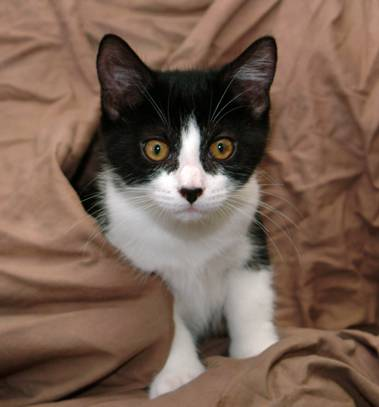

In [25]:
Image(filename='cat.1002.jpg')

In [26]:
prediction

array([0], dtype=int64)